In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ls ~/wide-data-exclude-u/butler_wide_20220930-data-lsst-backup.csv

/home/dave/wide-data-exclude-u/butler_wide_20220930-data-lsst-backup.csv


In [6]:
df = pd.read_csv('~/wide-data-exclude-u/butler_wide_20220930-data-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])
df

/tmp/ipykernel_25926/2928655123.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('~/wide-data-exclude-u/butler_wide_20220930-data-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])


,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_1051.zip,74748682,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.095821,2025-09-08 16:28:17.974411,2025-09-08 16:28:18.070232
1,collated_662.zip,101011394,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078913,2025-09-08 16:28:17.990210,2025-09-08 16:28:18.069123
2,collated_127.zip,96199294,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.105004,2025-09-08 16:28:18.111052,2025-09-08 16:28:18.216056
3,collated_1146.zip,102491566,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.082147,2025-09-08 16:28:18.072909,2025-09-08 16:28:18.155056
4,collated_696.zip,103928838,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078620,2025-09-08 16:28:18.096057,2025-09-08 16:28:18.174677
...,...,...,...,...,...,...
418136,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,89907840,NaN,0.799281,2025-09-08 23:14:51.991284,2025-09-08 23:14:52.790565
418137,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,104765760,NaN,0.696891,2025-09-08 23:14:52.281399,2025-09-08 23:14:52.978290
418138,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,110312640,NaN,1.377355,2025-09-08 23:14:52.305647,2025-09-08 23:14:53.683002
418139,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,132819840,NaN,1.110480,2025-09-08 23:14:53.563356,2025-09-08 23:14:54.673836


In [7]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_1051.zip,74748682,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.095821,2025-09-08 16:28:17.974411,2025-09-08 16:28:18.070232,False
2,collated_127.zip,96199294,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.105004,2025-09-08 16:28:18.111052,2025-09-08 16:28:18.216056,False
5,collated_2143.zip,87526010,butler_wide_20220930/data/u/ir-shir1/DRP/vhsCo...,0.117113,2025-09-08 16:28:18.197247,2025-09-08 16:28:18.314360,False
9,collated_1463.zip,89177482,butler_wide_20220930/data/u/ir-shir1/DRP/vhsCo...,0.098114,2025-09-08 16:28:18.250494,2025-09-08 16:28:18.348608,False
12,collated_2695.zip,117163150,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,0.087186,2025-09-08 16:28:18.341400,2025-09-08 16:28:18.428586,False
...,...,...,...,...,...,...,...
418116,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,135120960,NaN,1.156734,2025-09-08 23:14:40.634913,2025-09-08 23:14:41.791647,False
418119,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,77509440,NaN,0.772121,2025-09-08 23:14:42.165032,2025-09-08 23:14:42.937153,False
418122,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,135492480,NaN,1.228330,2025-09-08 23:14:43.489560,2025-09-08 23:14:44.717890,False
418133,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,150952320,NaN,1.167983,2025-09-08 23:14:50.407336,2025-09-08 23:14:51.575319,False


In [8]:
df[df['OVERLAP'] == True]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
1,collated_662.zip,101011394,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078913,2025-09-08 16:28:17.990210,2025-09-08 16:28:18.069123,True
3,collated_1146.zip,102491566,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.082147,2025-09-08 16:28:18.072909,2025-09-08 16:28:18.155056,True
4,collated_696.zip,103928838,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078620,2025-09-08 16:28:18.096057,2025-09-08 16:28:18.174677,True
6,collated_312.zip,119332286,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.153793,2025-09-08 16:28:18.084787,2025-09-08 16:28:18.238580,True
7,collated_2026.zip,102655862,butler_wide_20220930/data/u/ir-shir1/DRP/vhsCo...,0.094224,2025-09-08 16:28:18.128532,2025-09-08 16:28:18.222756,True
...,...,...,...,...,...,...,...
418135,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,167751360,NaN,1.301744,2025-09-08 23:14:50.544763,2025-09-08 23:14:51.846507,True
418137,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,104765760,NaN,0.696891,2025-09-08 23:14:52.281399,2025-09-08 23:14:52.978290,True
418138,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,110312640,NaN,1.377355,2025-09-08 23:14:52.305647,2025-09-08 23:14:53.683002,True
418139,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,132819840,NaN,1.110480,2025-09-08 23:14:53.563356,2025-09-08 23:14:54.673836,True


In [23]:
df['ZIP_CONTENTS'].iloc[0]

'butler_wide_20220930/data/u/ir-shir1/DRP/videoCoaddDetect/20221128T174328Z/deepCoadd_directWarp/8524/21/20121104/H/VIRCAM-H/648684/deepCoadd_directWarp_VIRCAM_8524_21_H_VIRCAM-H_648684_hscPdr2_u_ir-shir1_DRP_videoCoaddDetect_20221128T174328Z.fits,butler_wide_20220930/data/u/ir-shir1/DRP/videoCoaddDetect/20221128T174328Z/deepCoadd_directWarp/8524/59/20111009/K/VIRCAM-Ks/398194/deepCoadd_directWarp_VIRCAM_8524_59_K_VIRCAM-Ks_398194_hscPdr2_u_ir-shir1_DRP_videoCoaddDetect_20221128T174328Z.fits abbreviated'

In [9]:
df['FILES_PER_ZIP'] = len(df['ZIP_CONTENTS'].iloc[0].split(',')) if df['ZIP_CONTENTS'].iloc[0] else 0
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP
0,collated_1051.zip,74748682,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.095821,2025-09-08 16:28:17.974411,2025-09-08 16:28:18.070232,False,2
1,collated_662.zip,101011394,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078913,2025-09-08 16:28:17.990210,2025-09-08 16:28:18.069123,True,2
2,collated_127.zip,96199294,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.105004,2025-09-08 16:28:18.111052,2025-09-08 16:28:18.216056,False,2
3,collated_1146.zip,102491566,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.082147,2025-09-08 16:28:18.072909,2025-09-08 16:28:18.155056,True,2
4,collated_696.zip,103928838,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078620,2025-09-08 16:28:18.096057,2025-09-08 16:28:18.174677,True,2
...,...,...,...,...,...,...,...,...
418136,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,89907840,NaN,0.799281,2025-09-08 23:14:51.991284,2025-09-08 23:14:52.790565,False,2
418137,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,104765760,NaN,0.696891,2025-09-08 23:14:52.281399,2025-09-08 23:14:52.978290,True,2
418138,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,110312640,NaN,1.377355,2025-09-08 23:14:52.305647,2025-09-08 23:14:53.683002,True,2
418139,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,132819840,NaN,1.110480,2025-09-08 23:14:53.563356,2025-09-08 23:14:54.673836,True,2


In [10]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP,TYPE
0,collated_1051.zip,74748682,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.095821,2025-09-08 16:28:17.974411,2025-09-08 16:28:18.070232,False,2,zip
1,collated_662.zip,101011394,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078913,2025-09-08 16:28:17.990210,2025-09-08 16:28:18.069123,True,2,zip
2,collated_127.zip,96199294,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.105004,2025-09-08 16:28:18.111052,2025-09-08 16:28:18.216056,False,2,zip
3,collated_1146.zip,102491566,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.082147,2025-09-08 16:28:18.072909,2025-09-08 16:28:18.155056,True,2,zip
4,collated_696.zip,103928838,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.078620,2025-09-08 16:28:18.096057,2025-09-08 16:28:18.174677,True,2,zip
...,...,...,...,...,...,...,...,...,...
418136,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,89907840,NaN,0.799281,2025-09-08 23:14:51.991284,2025-09-08 23:14:52.790565,False,2,file
418137,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,104765760,NaN,0.696891,2025-09-08 23:14:52.281399,2025-09-08 23:14:52.978290,True,2,file
418138,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,110312640,NaN,1.377355,2025-09-08 23:14:52.305647,2025-09-08 23:14:53.683002,True,2,file
418139,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,132819840,NaN,1.110480,2025-09-08 23:14:53.563356,2025-09-08 23:14:54.673836,True,2,file


In [11]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(2304, 415837)

In [12]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

329.374434

In [13]:
print(f"Total upload time for zip files: {zip_upload_time} seconds")
print(f"Average upload time for zip files: {zip_upload_time / len(df[df['TYPE'] == 'zip'])} seconds")

Total upload time for zip files: 329.374434 seconds
Average upload time for zip files: 0.14295765364583335 seconds


In [14]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

241.3315813438967

In [15]:
print(f"Total zip file size: {zip_total_size / (1024**3)} GiB")
print(f"Average zip file size: {zip_total_size / len(df[df['TYPE'] == 'zip']) / 1024**3} GiB")

Total zip file size: 241.3315813438967 GiB
Average zip file size: 0.10474460995828849 GiB


In [16]:
df['TRANSFER_RATE'] = df['FILE_SIZE'] / df['UPLOAD_TIME'] * 8 / (1024**3)
df['TRANSFER_RATE'].describe()

count    418141.000000
mean          0.717600
std           0.629258
min           0.012307
25%           0.523808
50%           0.683891
75%           0.827417
max          13.222848
Name: TRANSFER_RATE, dtype: float64

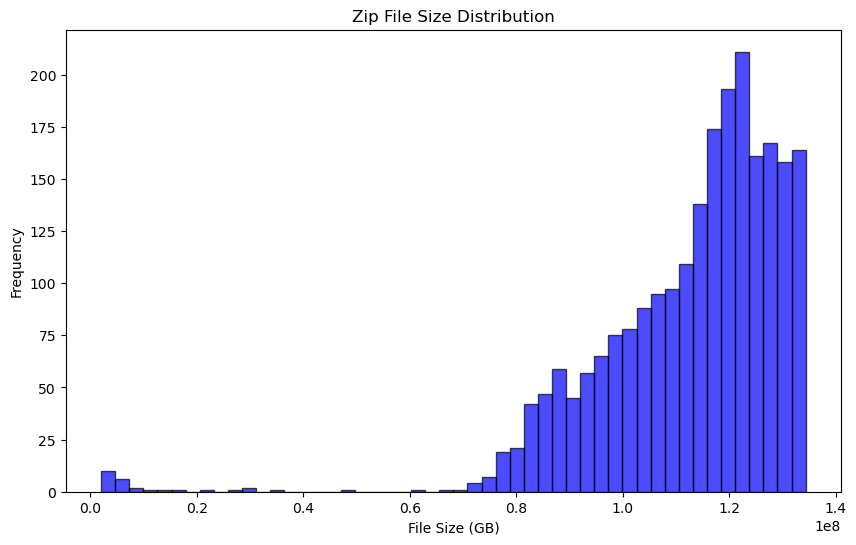

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILE_SIZE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution')
plt.xlabel('File Size (GB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

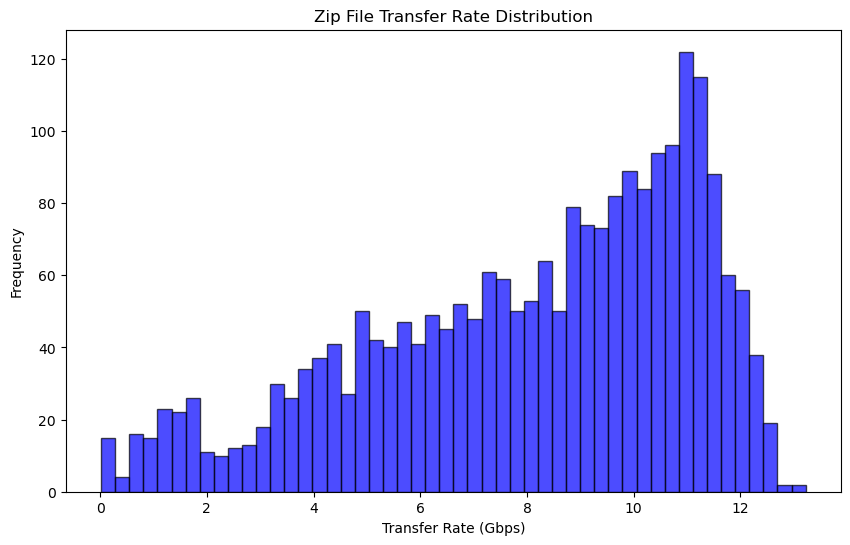

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

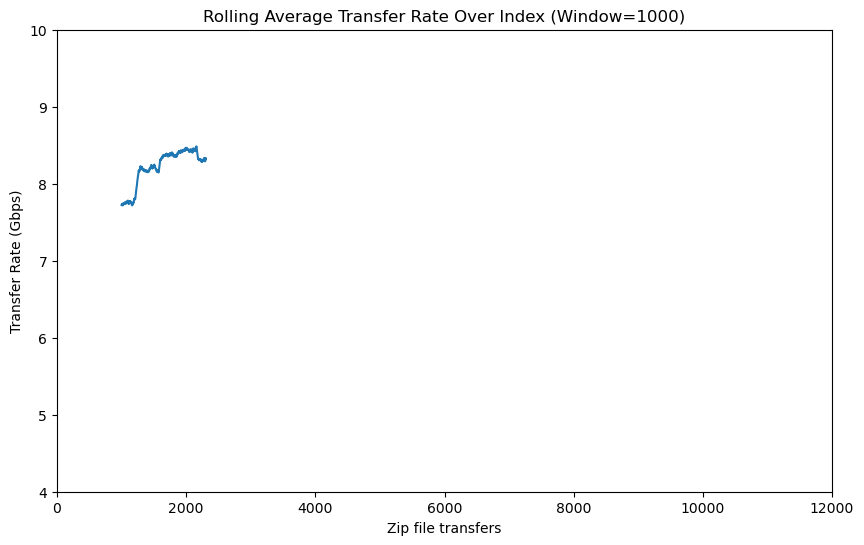

In [19]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].rolling(window=1000).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
plt.xlim(0,12000)
plt.ylim(4, 10)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

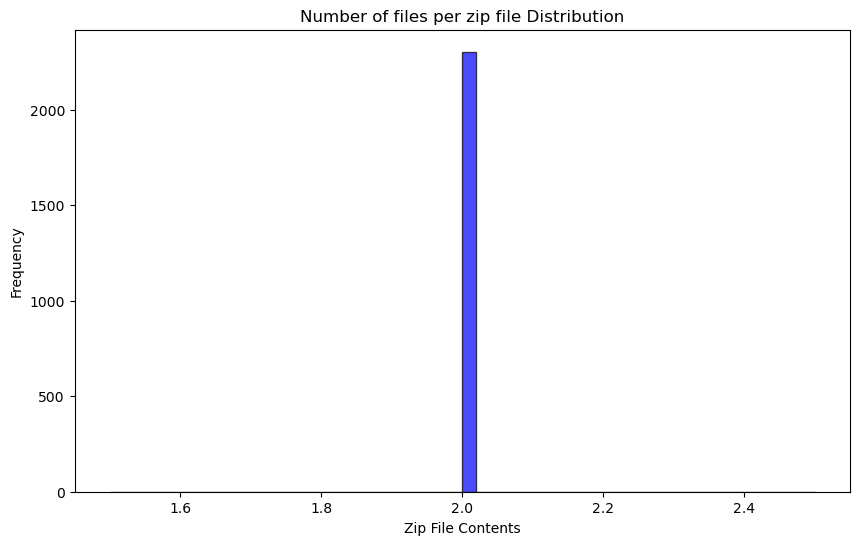

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Zip File Contents')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
df[df['TRANSFER_RATE'] > 10].sort_values(by='TRANSFER_RATE', ascending=False).head(100)

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP,TYPE,TRANSFER_RATE
644,collated_1009.zip,128927806,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.072646,2025-09-08 16:33:17.629327,2025-09-08 16:33:17.701973,True,2,zip,13.222848
455,collated_2369.zip,134218880,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.077162,2025-09-08 16:31:48.626992,2025-09-08 16:31:48.704154,False,2,zip,12.959858
89,collated_1092.zip,133466690,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.077338,2025-09-08 16:28:33.004784,2025-09-08 16:28:33.082122,True,2,zip,12.857901
274,collated_438.zip,133809454,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.077884,2025-09-08 16:29:56.298568,2025-09-08 16:29:56.376452,True,2,zip,12.800551
1738,collated_1409.zip,133443670,butler_wide_20220930/data/u/ir-shir1/DRP/vhsCo...,0.078342,2025-09-08 16:42:53.998524,2025-09-08 16:42:54.076866,False,2,zip,12.690930
...,...,...,...,...,...,...,...,...,...,...
1669,collated_3348.zip,133105306,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,0.082652,2025-09-08 16:42:10.625153,2025-09-08 16:42:10.707805,True,2,zip,11.998643
1695,collated_476.zip,131992174,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.081970,2025-09-08 16:42:18.479035,2025-09-08 16:42:18.561005,True,2,zip,11.997296
1075,collated_408.zip,129814898,butler_wide_20220930/data/u/ir-shir1/DRP/video...,0.080667,2025-09-08 16:37:12.685161,2025-09-08 16:37:12.765828,True,2,zip,11.989988
1550,collated_1913.zip,129337302,butler_wide_20220930/data/u/ir-shir1/DRP/vhsCo...,0.080449,2025-09-08 16:41:19.504237,2025-09-08 16:41:19.584686,True,2,zip,11.978247
